<a href="https://colab.research.google.com/github/LucasMirandaVS/projeto_sistema_recomendacao_filmes/blob/main/Implementando_o_Sistema_de_Recomenda%C3%A7%C3%A3o_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [287]:
#Manipulação
import pandas as pd
import numpy as np

#Visualização 
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#Sistema de Recomendação
import ast
from sklearn.feature_extraction.text import CountVectorizer

#Métricas
from sklearn.metrics.pairwise import cosine_similarity

#Deploy do Sistema de Recomendação
import pickle

# Importando os dados

In [ ]:
df = pd.read_csv("df_final.csv")

In [ ]:
df.shape

(6019, 22)

In [ ]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [ ]:
df.tail(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
6018,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",https://www.hbomax.com/moonshot,767825,"[{'id': 839, 'name': 'planet mars'}, {'id': 29...",en,Moonshot,In a future where Mars is terraformed and colo...,46.063,"[{'id': 12, 'logo_path': '/iaYpEp3LQmb8AfAtmTv...",...,0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Find the space to connect.,Moonshot,7.3,39,"[{'adult': False, 'gender': 2, 'id': 56730, 'k...","[{'adult': False, 'gender': 0, 'id': 17610, 'k..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                6019 non-null   int64  
 1   genres                6019 non-null   object 
 2   homepage              2633 non-null   object 
 3   id                    6019 non-null   int64  
 4   keywords              6019 non-null   object 
 5   original_language     6019 non-null   object 
 6   original_title        6018 non-null   object 
 7   overview              6015 non-null   object 
 8   popularity            6019 non-null   float64
 9   production_companies  6019 non-null   object 
 10  production_countries  6019 non-null   object 
 11  release_date          6017 non-null   object 
 12  revenue               6019 non-null   int64  
 13  runtime               6017 non-null   float64
 14  spoken_languages      6019 non-null   object 
 15  status               

#### estatísticas descritivas

In [ ]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,6.019000e+03,6019.000000,6019.000000,6.019000e+03,6017.000000,6019.000000,6019.000000
mean,2.775690e+07,153119.580661,36.977957,7.911198e+07,106.571049,6.181073,846.274796
std,4.218097e+07,219411.892403,290.144587,1.721551e+08,22.202877,1.169377,1595.979121
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,9893.500000,5.786276,0.000000e+00,94.000000,5.700000,66.000000
50%,1.100000e+07,27983.000000,14.382253,1.282781e+07,103.000000,6.300000,276.000000
75%,3.625000e+07,254471.000000,31.300027,8.209477e+07,117.000000,6.900000,882.000000
max,3.800000e+08,992536.000000,17193.415000,2.797801e+09,338.000000,10.000000,25045.000000


In [ ]:
df.describe(include="O") # O para os objetos

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew
count,6019,2633,6019,6019,6018,6015,6019,6019,6017,6019,6019,4960,6019,6019,6019
unique,1643,2592,5243,38,5971,5985,4803,615,3936,713,3,4900,5953,5956,5974
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,[],en,Shaft,"Set in 1977, back when sex was safe, pleasure ...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2021-09-10,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Risen,[],[]
freq,370,4,582,5699,2,2,374,2977,10,3171,6010,4,2,48,30


# Documentando os dados

In [ ]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

*   **budget**: Orçamento do Filmes em Dólares
*   **genres**: Lista de Dicionários com todos os gêneros associados ao filme
*   **homepage**: Site oficial do filme
*   **id**: Identificação (ID) do filme
*   **keywords**: Palavras chaves associadas ao filme
*   **original_language**: Idioma original do filme
*   **original_title**: Título original do filme
*   **overview**: Breve descrição do filme
*   **popularity**: Pontuação dada pelo TMDB
*   **production_companies**: Produtoras envolvidas na produção do filme
*   **release_data**: Data de Lançamento do Filme
*   **revenue**: Receita Total do filme em dólares
*   **runtime**: Tempo de execução do filme em minutos
*   **spoken_language**: Idiomas falados no filme
*   **status**: Status do filme (lançado, para ser lançado, anunciado, etc)
*   **tagline**: Tagline do filme
*   **title**: Título oficial do filme
*   **vote_average**: Avaliação média do filme
*   **vote_count**: Número de votos contabilizados pelo TMDB
*   **cast**: Elenco do filme
*   **crew**: Equipe Técnica

#### Dados faltantes

In [ ]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3386
id                         0
keywords                   0
original_language          0
original_title             1
overview                   4
popularity                 0
production_companies       0
production_countries       0
release_date               2
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                 1059
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

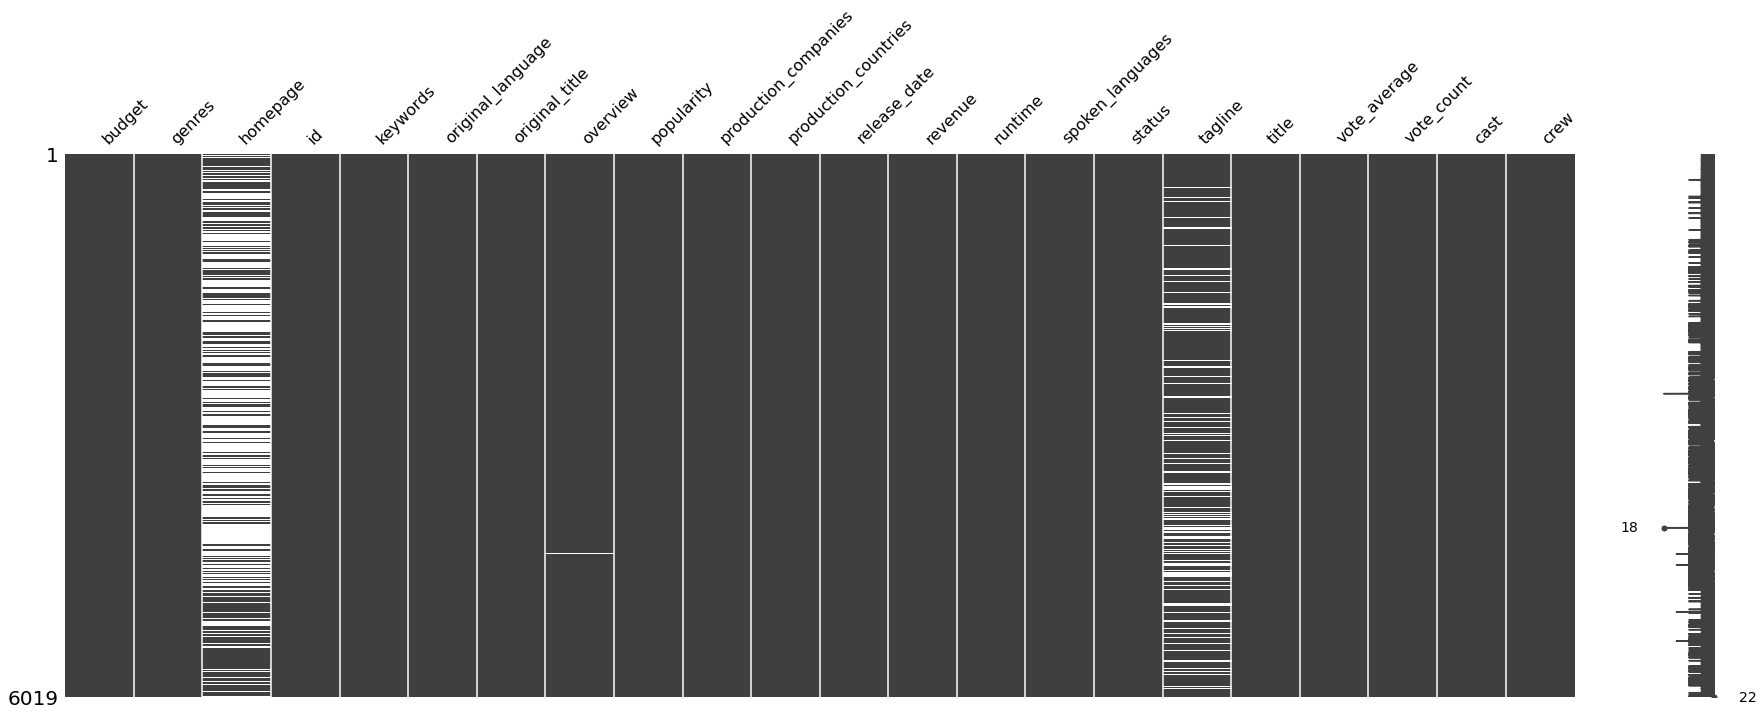

In [ ]:
# Visualizando os dados faltantes
missingno.matrix(df, figsize=(30,10))

In [ ]:
df.isnull().sum().sort_values(ascending=False)

homepage                3386
tagline                 1059
overview                   4
release_date               2
runtime                    2
original_title             1
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
revenue                    0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,"[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de..."
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...",...,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,"[{""cast_id"": 1, ""character"": ""Prince Caspian"",...","[{""credit_id"": ""55a239e69251412979002e8b"", ""de..."
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...",...,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337,"[{""cast_id"": 5, ""character"": ""Ann Darrow"", ""cr...","[{""credit_id"": ""52fe422ec3a36847f800a1d7"", ""de..."
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114,"[{""cast_id"": 3, ""character"": ""Lieutenant Alex ...","[{""credit_id"": ""52fe469ec3a36847f8108d45"", ""de..."
33,210000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,36668,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 8828, ...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,459359555,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525,"[{""cast_id"": 4, ""character"": ""Logan / Wolverin...","[{""credit_id"": ""538d82720e0a26670e005e83"", ""de..."


In [ ]:
df.shape

(6019, 22)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
linhas, colunas = df.shape

In [ ]:
print(linhas)

6019


In [ ]:
print(colunas)

22


In [ ]:
faltantes_percentual = (df.isnull().sum()/linhas) * 100

In [ ]:
print(faltantes_percentual)

budget                   0.000000
genres                   0.000000
homepage                56.255192
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.016614
overview                 0.066456
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.033228
revenue                  0.000000
runtime                  0.033228
spoken_languages         0.000000
status                   0.000000
tagline                 17.594285
title                    0.000000
vote_average             0.000000
vote_count               0.000000
cast                     0.000000
crew                     0.000000
dtype: float64


#### Dados Duplicados

In [ ]:
df[df.duplicated()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
5833,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,750253,"[{'id': 14985, 'name': 'ireland'}, {'id': 1569...",en,My Son,"When a man's only son goes missing, he travels...",13.863,"[{'id': 104, 'logo_path': '/9aotxauvc9685tq9pT...",...,0,95.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A groundbreaking achievement in filmmaking whe...,My Son,6.300,275,"[{'adult': False, 'gender': 2, 'id': 5530, 'kn...","[{'adult': False, 'gender': 2, 'id': 8570, 'kn..."
5936,0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",https://apple.co/_SwanSong,765245,"[{'id': 2964, 'name': 'future'}, {'id': 6155, ...",en,Swan Song,"In the near future, Cameron Turner is diagnose...",40.948,"[{'id': 10039, 'logo_path': '/b8w4LldQolMKiLZw...",...,0,112.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"A thought-provoking exploration of love, loss,...",Swan Song,7.400,329,"[{'adult': False, 'gender': 2, 'id': 932967, '...","[{'adult': False, 'gender': 2, 'id': 10684, 'k..."
5987,120000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.unchartedmovie.com,335787,"[{'id': 1454, 'name': 'treasure'}, {'id': 6956...",en,Uncharted,"A young street-smart, Nathan Drake and his wis...",841.696,"[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLu...",...,400780000,116.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Fortune favors the bold.,Uncharted,7.146,2875,"[{'adult': False, 'gender': 2, 'id': 1136406, ...","[{'adult': False, 'gender': 1, 'id': 2215, 'kn..."
5997,185000000,"[{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na...",https://www.thebatman.com,414906,"[{'id': 853, 'name': 'crime fighter'}, {'id': ...",en,The Batman,"In his second year of fighting crime, Batman u...",794.095,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",...,770836163,177.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Unmask the truth.,The Batman,7.758,5686,"[{'adult': False, 'gender': 2, 'id': 11288, 'k...","[{'adult': False, 'gender': 2, 'id': 2122, 'kn..."


Agora indo pras variáveis

#### Budget

In [ ]:
df["budget"].head()

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

In [ ]:
type(df["budget"])

pandas.core.series.Series

In [ ]:
df["budget"].dtypes

dtype('int64')

In [ ]:
df["budget"].describe().round(2)

count    6.019000e+03
mean     2.775690e+07
std      4.218097e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+07
75%      3.625000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [ ]:
df['budget'].min()

0

In [ ]:
df['budget'].max()

380000000

In [ ]:
df['budget'].std()

42180970.950464904

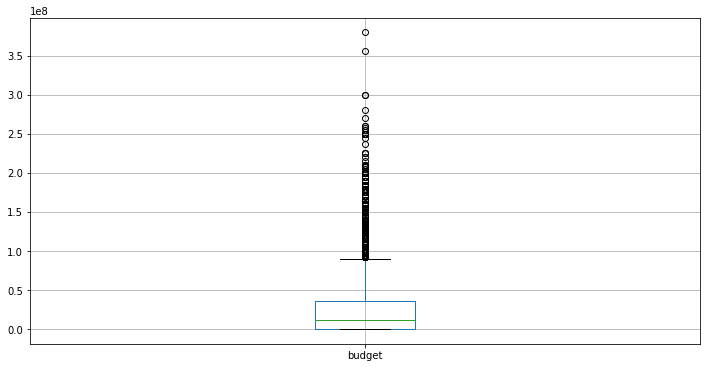

In [ ]:
# Boxplot pra visualizar a dispesrão do budget
plt.figure(figsize=(12,6))
df.boxplot('budget')
plt.show()

tem bastante outlier.

#### genres

In [ ]:
df["genres"].head(5)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [ ]:
type(df["genres"])

pandas.core.series.Series

In [ ]:
df["genres"].dtypes

dtype('O')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                6019 non-null   int64  
 1   genres                6019 non-null   object 
 2   homepage              2633 non-null   object 
 3   id                    6019 non-null   int64  
 4   keywords              6019 non-null   object 
 5   original_language     6019 non-null   object 
 6   original_title        6018 non-null   object 
 7   overview              6015 non-null   object 
 8   popularity            6019 non-null   float64
 9   production_companies  6019 non-null   object 
 10  production_countries  6019 non-null   object 
 11  release_date          6017 non-null   object 
 12  revenue               6019 non-null   int64  
 13  runtime               6017 non-null   float64
 14  spoken_languages      6019 non-null   object 
 15  status               

#### homepage

In [ ]:
df["homepage"].head()

0                     http://www.avatarmovie.com/
1    http://disney.go.com/disneypictures/pirates/
2     http://www.sonypictures.com/movies/spectre/
3              http://www.thedarkknightrises.com/
4            http://movies.disney.com/john-carter
Name: homepage, dtype: object

In [ ]:
df["homepage"].dtypes

dtype('O')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

homepage                3386
tagline                 1059
overview                   4
release_date               2
runtime                    2
original_title             1
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
revenue                    0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

#### id

In [ ]:
df["id"].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: id, dtype: int64

In [ ]:
df["id"].dtypes

dtype('int64')

In [ ]:
df["id"].describe()

count      6019.000000
mean     153119.580661
std      219411.892403
min           5.000000
25%        9893.500000
50%       27983.000000
75%      254471.000000
max      992536.000000
Name: id, dtype: float64

#### keywords

In [ ]:
df["keywords"].head()

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

In [ ]:
df["keywords"].dtypes

dtype('O')

#### original language

In [ ]:
df["original_language"].head()

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [ ]:
df["original_language"].nunique()

38

In [ ]:
df["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el', 'ca'], dtype=object)

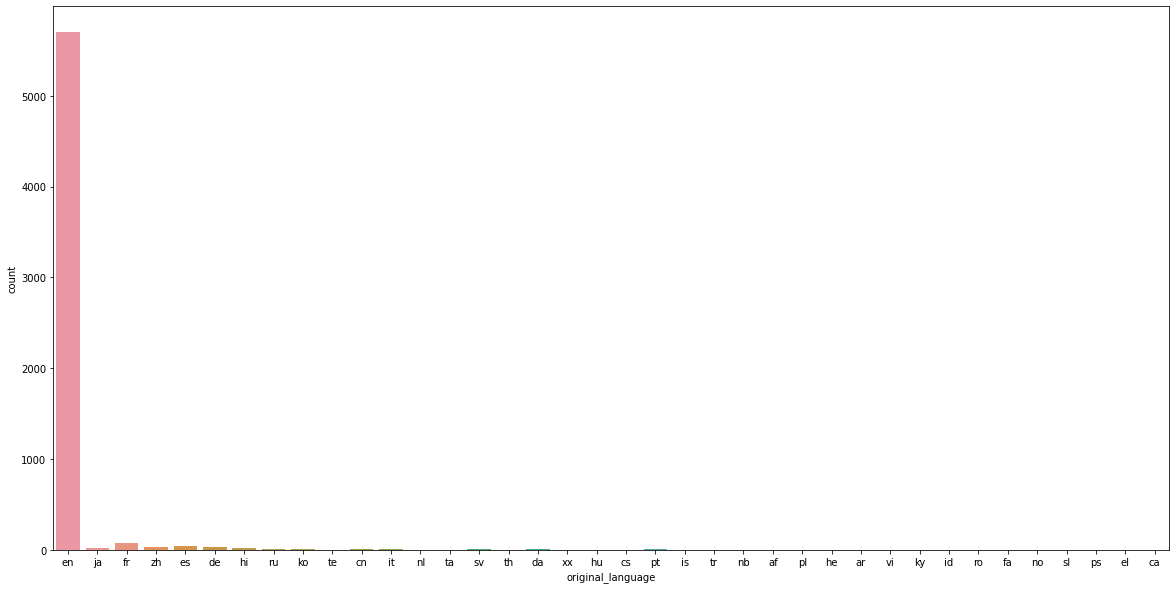

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = "original_language", data=df)
plt.show()

A maioria esmagadora da base é americana

In [ ]:
df["original_language"].value_counts()

en    5699
fr      75
es      38
zh      28
de      27
ja      21
hi      19
it      15
cn      12
ko      11
ru      11
pt      10
da       7
sv       5
fa       4
nl       4
th       3
ar       3
he       3
tr       2
ro       2
id       2
cs       2
ta       2
nb       1
af       1
pl       1
is       1
hu       1
vi       1
ky       1
xx       1
te       1
no       1
sl       1
ps       1
el       1
ca       1
Name: original_language, dtype: int64

In [ ]:
df["original_language"].describe()

count     6019
unique      38
top         en
freq      5699
Name: original_language, dtype: object

#### original title

In [ ]:
df["original_title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

In [ ]:
df["original_title"].dtypes

dtype('O')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                6019 non-null   int64  
 1   genres                6019 non-null   object 
 2   homepage              2633 non-null   object 
 3   id                    6019 non-null   int64  
 4   keywords              6019 non-null   object 
 5   original_language     6019 non-null   object 
 6   original_title        6018 non-null   object 
 7   overview              6015 non-null   object 
 8   popularity            6019 non-null   float64
 9   production_companies  6019 non-null   object 
 10  production_countries  6019 non-null   object 
 11  release_date          6017 non-null   object 
 12  revenue               6019 non-null   int64  
 13  runtime               6017 non-null   float64
 14  spoken_languages      6019 non-null   object 
 15  status               

In [ ]:
df["original_title"].nunique()

5971

In [ ]:
df["original_title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Infinite Storm', '7 Days', 'Moonshot'], dtype=object)

In [ ]:
df["original_title"].count()

6018

In [ ]:
df["original_title"].describe()

count      6018
unique     5971
top       Shaft
freq          2
Name: original_title, dtype: object

#### overview

In [ ]:
df["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [ ]:
df["overview"].nunique()

5985

In [ ]:
df["overview"].shape

(6019,)

In [ ]:
df["overview"].describe()

count                                                  6015
unique                                                 5985
top       Set in 1977, back when sex was safe, pleasure ...
freq                                                      2
Name: overview, dtype: object

In [ ]:
df["overview"].dtypes

dtype('O')

#### Popularity

In [ ]:
df["popularity"].head()

0    150.437577
1    139.082615
2    107.376788
3    112.312950
4     43.926995
Name: popularity, dtype: float64

In [ ]:
df["popularity"].dtypes

dtype('float64')

In [ ]:
df["popularity"].describe()

count     6019.000000
mean        36.977957
std        290.144587
min          0.000000
25%          5.786276
50%         14.382253
75%         31.300027
max      17193.415000
Name: popularity, dtype: float64

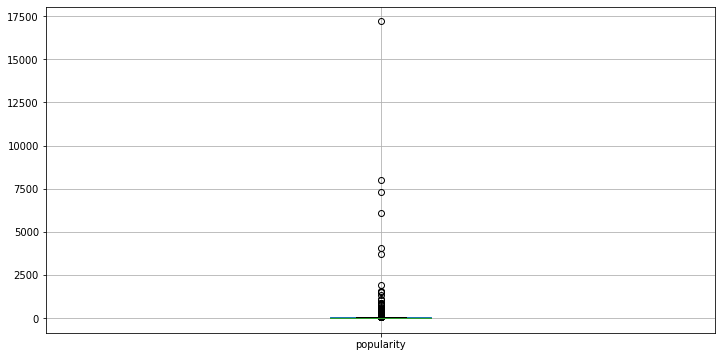

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot('popularity')
plt.show()

#### production companies

In [ ]:
df["production_companies"].head()

0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
2    [{"name": "Columbia Pictures", "id": 5}, {"nam...
3    [{"name": "Legendary Pictures", "id": 923}, {"...
4          [{"name": "Walt Disney Pictures", "id": 2}]
Name: production_companies, dtype: object

In [ ]:
df["production_companies"].dtypes

dtype('O')

In [ ]:
df["production_companies"].describe()

count     6019
unique    4803
top         []
freq       374
Name: production_companies, dtype: object

#### release date

In [ ]:
df["release_date"].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [ ]:
df["release_date"].dtypes

dtype('O')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                6019 non-null   int64  
 1   genres                6019 non-null   object 
 2   homepage              2633 non-null   object 
 3   id                    6019 non-null   int64  
 4   keywords              6019 non-null   object 
 5   original_language     6019 non-null   object 
 6   original_title        6018 non-null   object 
 7   overview              6015 non-null   object 
 8   popularity            6019 non-null   float64
 9   production_companies  6019 non-null   object 
 10  production_countries  6019 non-null   object 
 11  release_date          6017 non-null   object 
 12  revenue               6019 non-null   int64  
 13  runtime               6017 non-null   float64
 14  spoken_languages      6019 non-null   object 
 15  status               

In [ ]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")

In [ ]:
df["release_date"].dtypes

dtype('<M8[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                6019 non-null   int64         
 1   genres                6019 non-null   object        
 2   homepage              2633 non-null   object        
 3   id                    6019 non-null   int64         
 4   keywords              6019 non-null   object        
 5   original_language     6019 non-null   object        
 6   original_title        6018 non-null   object        
 7   overview              6015 non-null   object        
 8   popularity            6019 non-null   float64       
 9   production_companies  6019 non-null   object        
 10  production_countries  6019 non-null   object        
 11  release_date          6017 non-null   datetime64[ns]
 12  revenue               6019 non-null   int64         
 13  runtime           

In [ ]:
df["release_date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6017
unique                   3936
top       2021-09-10 00:00:00
freq                       10
first     1913-05-01 00:00:00
last      2022-08-05 00:00:00
Name: release_date, dtype: object

In [ ]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
df[df["release_date"] == "2021-10-28 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
5883,0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",https://www.searchlightpictures.com/antlers,516329,"[{'id': 798, 'name': 'sheriff'}, {'id': 1897, ...",en,Antlers,"A small-town Oregon teacher and her brother, t...",173.366,"[{'id': 423, 'logo_path': '/uvA6e2O31qaonsbYd8...",...,18312201,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Pray it desires not you.,Antlers,6.4,721,"[{'adult': False, 'gender': 1, 'id': 41292, 'k...","[{'adult': False, 'gender': 1, 'id': 1720, 'kn..."


In [ ]:
df[df["release_date"] == "1913-05-01 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
4829,0,[],NaN,190746,[],en,Kri,Kri-Kri fools his friend by pretending to be h...,0.6,[],...,0,6.0,[],Released,NaN,Kri Kri's House,5.0,1,"[{'adult': False, 'gender': 0, 'id': 1121474, ...",[]


#### revenue

In [ ]:
df["revenue"].head()

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

In [ ]:
df["revenue"].describe().round(2)

count    6.019000e+03
mean     7.911198e+07
std      1.721551e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.282781e+07
75%      8.209477e+07
max      2.797801e+09
Name: revenue, dtype: float64

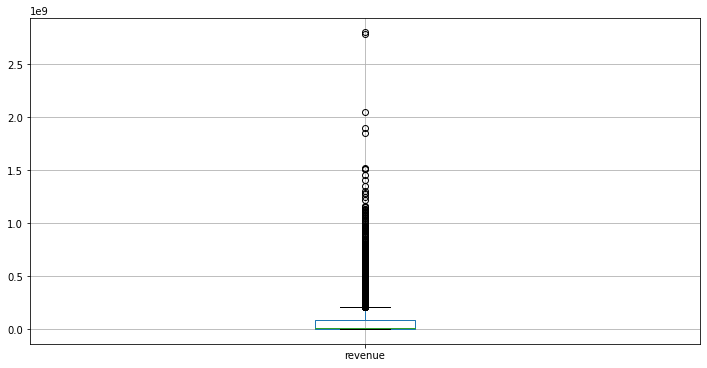

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot("revenue")
plt.show()

#### runtime

In [ ]:
df["runtime"].head()

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [ ]:
df["runtime"].dtypes

dtype('float64')

In [ ]:
df["runtime"].describe()

count    6017.000000
mean      106.571049
std        22.202877
min         0.000000
25%        94.000000
50%       103.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64

In [ ]:
df.isnull().sum().sort_values(ascending=False)

homepage                3386
tagline                 1059
overview                   4
release_date               2
runtime                    2
original_title             1
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
revenue                    0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

In [ ]:
df[df["runtime"] == 338.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...",...,871279,338.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.7,50,"[{""cast_id"": 4, ""character"": ""Ilich Ram\u00edr...","[{""credit_id"": ""57352b61c3a3680253000870"", ""de..."


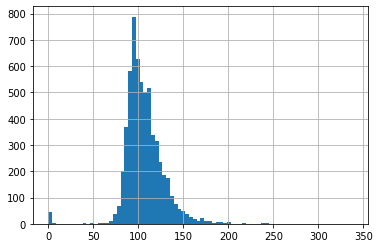

In [ ]:
df["runtime"].hist(bins=80)

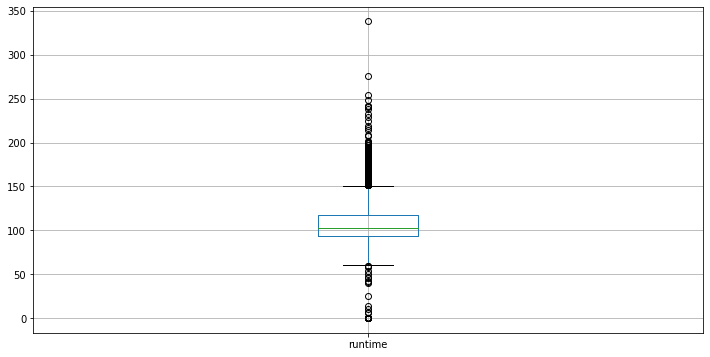

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot("runtime")
plt.show()

#### spoken languages

In [ ]:
df["spoken_languages"].head()

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

In [ ]:
df["spoken_languages"].dtypes

dtype('O')

#### status

In [ ]:
df["status"].head()

0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

In [ ]:
df["status"].nunique()

3

In [ ]:
df["status"].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [ ]:
df["status"].value_counts()

Released           6010
Rumored               5
Post Production       4
Name: status, dtype: int64

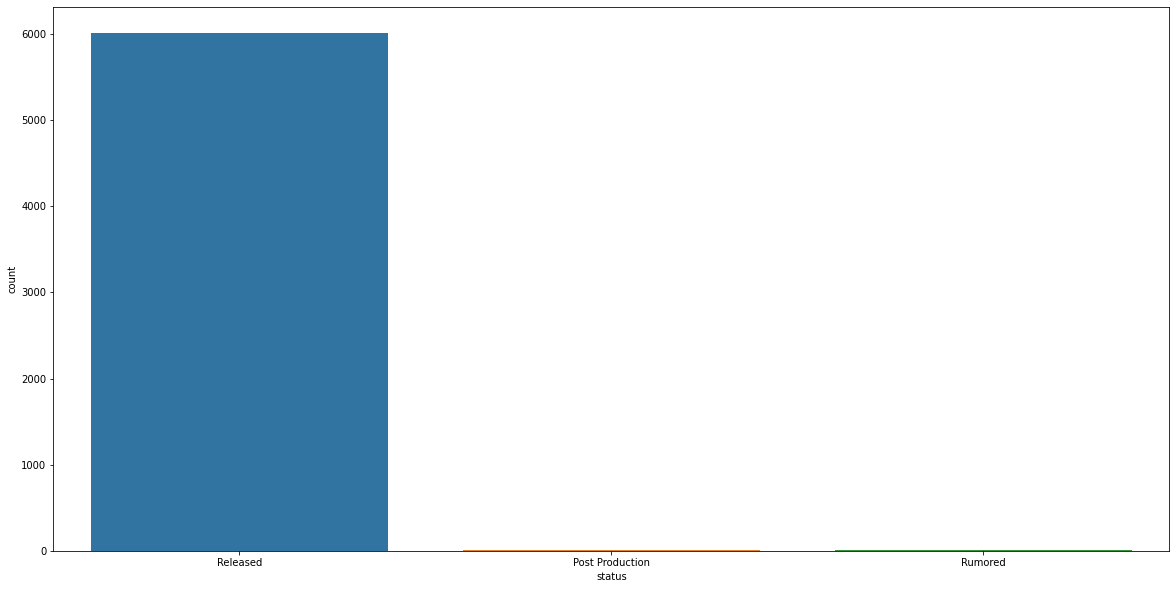

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x="status", data=df)
plt.show()

#### tagline

In [ ]:
df["tagline"].head()

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object

In [ ]:
df['tagline'].describe()

count                       4960
unique                      4900
top       Based on a true story.
freq                           4
Name: tagline, dtype: object

#### title

In [ ]:
df['title'].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

In [ ]:
df["title"].dtypes

dtype('O')

In [ ]:
df["title"].nunique()

5953

In [ ]:
df["title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Everything Everywhere All at Once', 'Infinite Storm',
       'Moonshot'], dtype=object)

#### vote average

In [ ]:
df['vote_average'].head()

0    7.2
1    6.9
2    6.3
3    7.6
4    6.1
Name: vote_average, dtype: float64

In [ ]:
df['vote_average'].dtypes

dtype('float64')

In [ ]:
df['vote_average'].describe()

count    6019.000000
mean        6.181073
std         1.169377
min         0.000000
25%         5.700000
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

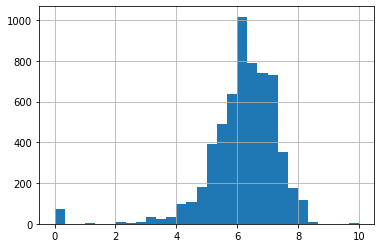

In [ ]:
df['vote_average'].hist(bins=30)

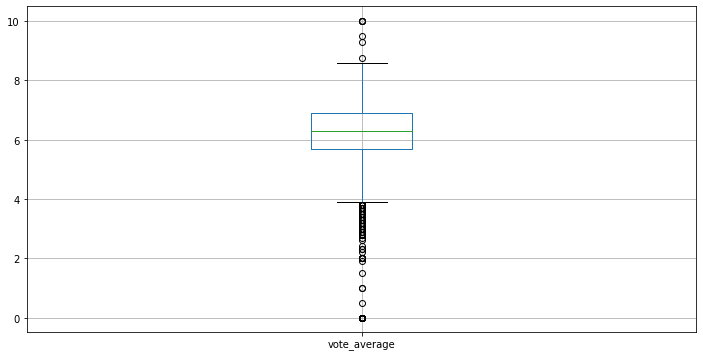

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot("vote_average")
plt.show()

In [ ]:
df[df["vote_average"] == 10.0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],...,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,"[{""cast_id"": 11, ""character"": ""Emily"", ""credit...","[{""credit_id"": ""52fe4a2f9251416c910c5edb"", ""de..."
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...",...,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"[{""cast_id"": 1, ""character"": ""Keller Coleman"",...","[{""credit_id"": ""52fe499bc3a368484e13445b"", ""de..."
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],...,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[]
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]",...,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]


In [ ]:
df[df["vote_average"] == 0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]",...,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0,"[{""cast_id"": 4, ""character"": ""Jack"", ""credit_i...","[{""credit_id"": ""5500016ac3a3685b9900106a"", ""de..."
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]",...,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0,"[{""cast_id"": 4, ""character"": ""Joey"", ""credit_i...","[{""credit_id"": ""5617d84d92514166e2001e21"", ""de..."
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]",...,0,88.0,[],Released,NaN,Running Forever,0.0,0,[],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],...,0,200.0,[],Released,NaN,The Secret,0.0,0,"[{""cast_id"": 0, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""586756379251413e4c006618"", ""de..."
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...",...,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",https://www.killianandthecomebackkidsmovie.com/,803708,[],en,Killian & the Comeback Kids,Forced to return to his struggling hometown af...,0.600000,"[{'id': 125814, 'logo_path': None, 'name': 'Ho...",...,0,0.0,[],Released,NaN,Killian & the Comeback Kids,0.0,0,"[{'adult': False, 'gender': 0, 'id': 3002910, ...","[{'adult': False, 'gender': 1, 'id': 1813358, ..."
5709,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,347616,"[{'id': 5565, 'name': 'biography'}]",en,Grace and Grit,The true love story of iconic philosopher Ken ...,3.023000,"[{'id': 45116, 'logo_path': None, 'name': 'Gre...",...,0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Love knows no boundaries,Grace and Grit,0.0,0,"[{'adult': False, 'gender': 1, 'id': 8211, 'kn...","[{'adult': False, 'gender': 1, 'id': 35512, 'k..."
5719,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,839017,[],en,DOMINO: Battle of the Bones,"Hoping to reclaim his former glory, a fallen d...",1.116000,[],...,0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Whoop. Some. Ass.,Domino: Battle of the Bones,0.0,0,"[{'adult': False, 'gender': 2, 'id': 15234, 'k...","[{'adult': False, 'gender': 2, 'id': 942302, '..."
5787,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.hulu.com/movie/homeroom-3ba54579-2...,776523,"[{'id': 3687, 'name': 'graduation'}, {'id': 11...",en,Homeroom,Following the class of 2020 at Oakland High Sc...,2.450000,"[{'id': 125345, 'logo_path': '/z3Ly3BKafB4PUkv...",...,0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This is not a test.,Homeroom,0.0,0,"[{'adult': F

#### vote count

In [ ]:
df['vote_count'].head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [ ]:
df['vote_count'].dtypes

dtype('int64')

In [ ]:
df['vote_count'].describe()

count     6019.000000
mean       846.274796
std       1595.979121
min          0.000000
25%         66.000000
50%        276.000000
75%        882.000000
max      25045.000000
Name: vote_count, dtype: float64

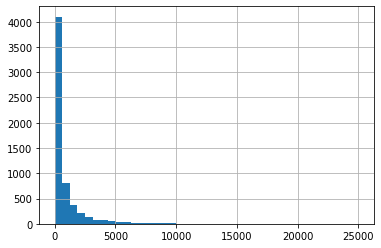

In [ ]:
df['vote_count'].hist(bins=40)

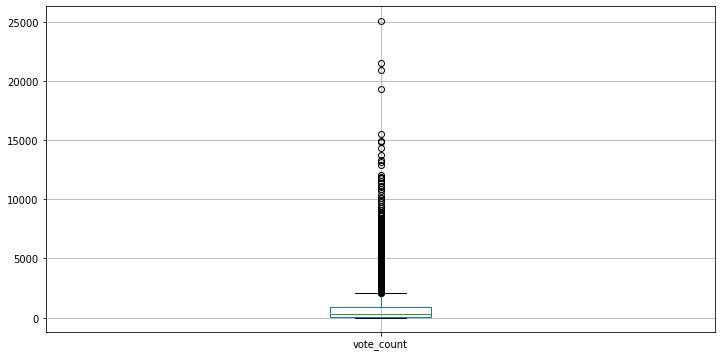

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot("vote_count")
plt.show()

In [ ]:
q1 = df["vote_count"].quantile(0.25)
q3 = df["vote_count"].quantile(0.75)
IQR = q3 - q1
print(IQR)

816.0


#### cast

In [ ]:
df["cast"].head()

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

In [ ]:
df["cast"].dtypes

dtype('O')

In [ ]:
df["crew"].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

#### Crew

In [ ]:
df["crew"].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

In [ ]:
df["crew"].dtypes

dtype('O')

# Analisando e interpretando as colunas

#### Retorno dos filmes

In [ ]:
df['budget'] = pd.to_numeric(df["budget"], errors="coerce")
df["budget"] = df["budget"].replace(0, np.nan)

In [ ]:
df["return"]  = df["revenue"]/df["budget"]

In [ ]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566


In [ ]:
df.head().transpose()

,0,1,2,3,4
budget,237000000.0,300000000.0,245000000.0,250000000.0,260000000.0
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [ ]:
df[df["return"] < 1 ]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
13,255000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://disney.go.com/the-lone-ranger/,57201,"[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,149.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Take Off the Mask,The Lone Ranger,5.900,2311,"[{""cast_id"": 4, ""character"": ""Tonto"", ""credit_...","[{""credit_id"": ""52fe4928c3a36847f818be95"", ""de...",0.350157
73,175000000.0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",http://www.evanalmighty.com/,2698,"[{""id"": 494, ""name"": ""father son relationship""...",en,Evan Almighty,God contacts Congressman Evan Baxter and tells...,27.082182,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A comedy of biblical proportions,Evan Almighty,5.300,1151,"[{""cast_id"": 19, ""character"": ""Evan Baxter"", ""...","[{""credit_id"": ""52fe4365c3a36847f805145d"", ""de...",0.988571
83,27000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...",...,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.800,34,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de...",0.000000
84,175000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",NaN,64686,"[{""id"": 233, ""name"": ""japan""}, {""id"": 236, ""na...",en,47 Ronin,"Based on the original 1941 movie from Japan, a...",41.796339,"[{""name"": ""Mid Atlantic Films"", ""id"": 2735}, {...",...,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,For courage. For loyalty. For honor.,47 Ronin,5.900,1326,"[{""cast_id"": 1001, ""character"": ""Kai"", ""credit...","[{""credit_id"": ""52fe46e4c3a368484e0a98ef"", ""de...",0.862643
135,150000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.500,549,"[{""cast_id"": 3, ""character"": ""Lawrence Talbot""...","[{""credit_id"": ""538aeb0a0e0a266718000fc2"", ""de...",0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,20000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",https://www.netflix.com/title/81483977,632727,"[{'id': 1556, 'name': 'texas'}, {'id': 1583, '...",en,Texas Chainsaw Massacre,"After nearly 50 years of hiding, Leatherface r...",343.437000,"[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...",...,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The face of madness returns.,Texas Chainsaw Massacre,5.226,858,"[{'adult': False, 'gender': 1, 'id': 2035239, ...","[{'adult': False, 'gender': 2, 'id': 10051, 'k...",0.000000
5992,20000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.unitedartistsreleasing.com/cyrano/...,730047,"[{'id': 4326, 'name': 'theater play'}, {'id': ...",en,Cyrano,"A man ahead of his time, Cyrano de Bergerac da...",13.514000,"[{'id': 21, 'logo_path': '/aOWKh4gkNrfFZ3Ep7n0...",...,124.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Have you ever loved someone?,Cyrano,6.300,140,"[{'adult': False, 'gender': 2, 'id': 22970, 

In [ ]:
df["return"].describe().round(2)

count       4285.00
mean        2227.17
std       130742.47
min            0.00
25%            0.47
50%            1.84
75%            3.94
max      8500000.00
Name: return, dtype: float64

In [ ]:
df[df["return"] == 8500000.00]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
4238,1.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,3082,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,...",en,Modern Times,The Tramp struggles to live in modern industri...,28.27648,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He stands alone as the greatest entertainer of...,Modern Times,8.1,856,"[{""cast_id"": 8, ""character"": ""A factory worker...","[{""credit_id"": ""5621aeadc3a3680e1d00a09a"", ""de...",8500000.0


#### criando uma coluna só pro ano

In [ ]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4285 non-null   float64       
 1   genres                6019 non-null   object        
 2   homepage              2633 non-null   object        
 3   id                    6019 non-null   int64         
 4   keywords              6019 non-null   object        
 5   original_language     6019 non-null   object        
 6   original_title        6018 non-null   object        
 7   overview              6015 non-null   object        
 8   popularity            6019 non-null   float64       
 9   production_companies  6019 non-null   object        
 10  production_countries  6019 non-null   object        
 11  release_date          6017 non-null   datetime64[ns]
 12  revenue               6019 non-null   int64         
 13  runtime           

In [ ]:
df.isnull().sum()

budget                  1734
genres                     0
homepage                3386
id                         0
keywords                   0
original_language          0
original_title             1
overview                   4
popularity                 0
production_companies       0
production_countries       0
release_date               2
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                 1059
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1734
year                       2
dtype: int64

In [ ]:
df[df["year"].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
4553,NaN,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],...,[],Released,NaN,America Is Still the Place,0.0,0,[],[],NaN,NaN
5395,NaN,[],NaN,128163,[],en,Blood and Money,Friends reunite in a cabin in the woods. What...,0.6,[],...,[],Released,NaN,"Blood, Friends and Money",0.0,0,[],[],NaN,NaN


In [ ]:
df.drop(index = 4553, inplace=True)

In [ ]:
df.isnull().sum()

budget                  1733
genres                     0
homepage                3385
id                         0
keywords                   0
original_language          0
original_title             1
overview                   4
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                 1058
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1733
year                       1
dtype: int64

In [ ]:
df.isnull().sum()

budget                  1733
genres                     0
homepage                3385
id                         0
keywords                   0
original_language          0
original_title             1
overview                   4
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                 1058
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1733
year                       1
dtype: int64

In [ ]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007.0


In [ ]:
df[["original_title", "year", "return"]].sort_values("return", ascending=False).head(5)

,original_title,year,return
4238,Modern Times,1936.0,8.500000e+06
3137,Nurse 3-D,2013.0,1.000000e+06
4577,Paranormal Activity,2007.0,1.289039e+04
4582,Tarnation,2003.0,5.330339e+03
4496,The Blair Witch Project,1999.0,4.133333e+03


In [ ]:
df.isnull().sum()

budget                  1733
genres                     0
homepage                3385
id                         0
keywords                   0
original_language          0
original_title             1
overview                   4
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                 1058
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1733
year                       1
dtype: int64

#### tirando o NA do original title



In [ ]:
df[df["original_title"].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
5946,NaN,"[{'id': 35, 'name': 'Comedy'}]",https://urbanmatter.com/better-writing-through...,647808,"[{'id': 246, 'name': 'dancing'}, {'id': 772, '...",en,NaN,Catherine Tate's iconic character Nan hits the...,4.682,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A coming of age movie.,The Nan Movie,5.4,10,"[{'adult': False, 'gender': 1, 'id': 47646, 'k...","[{'adult': False, 'gender': 2, 'id': 21422, 'k...",NaN,2022.0


In [ ]:
df.drop(index = 5946, inplace=True)

In [ ]:
df.isnull().sum()

budget                  1732
genres                     0
homepage                3385
id                         0
keywords                   0
original_language          0
original_title             0
overview                   4
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                 1058
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1732
year                       1
dtype: int64

#### sera que tem palavras que aparecem com mais frequencia no título e no overview?

In [ ]:
df["title"] = df["title"].astype("str")

In [ ]:
title_corpus = " ".join(df["title"])

In [ ]:
print(title_corpus)

Avatar Pirates of the Caribbean: At World's End Spectre The Dark Knight Rises John Carter Spider-Man 3 Tangled Avengers: Age of Ultron Harry Potter and the Half-Blood Prince Batman v Superman: Dawn of Justice Superman Returns Quantum of Solace Pirates of the Caribbean: Dead Man's Chest The Lone Ranger Man of Steel The Chronicles of Narnia: Prince Caspian The Avengers Pirates of the Caribbean: On Stranger Tides Men in Black 3 The Hobbit: The Battle of the Five Armies The Amazing Spider-Man Robin Hood The Hobbit: The Desolation of Smaug The Golden Compass King Kong Titanic Captain America: Civil War Battleship Jurassic World Skyfall Spider-Man 2 Iron Man 3 Alice in Wonderland X-Men: The Last Stand Monsters University Transformers: Revenge of the Fallen Transformers: Age of Extinction Oz: The Great and Powerful The Amazing Spider-Man 2 TRON: Legacy Cars 2 Green Lantern Toy Story 3 Terminator Salvation Furious 7 World War Z X-Men: Days of Future Past Star Trek Into Darkness Jack the Giant 

In [ ]:
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(title_corpus)

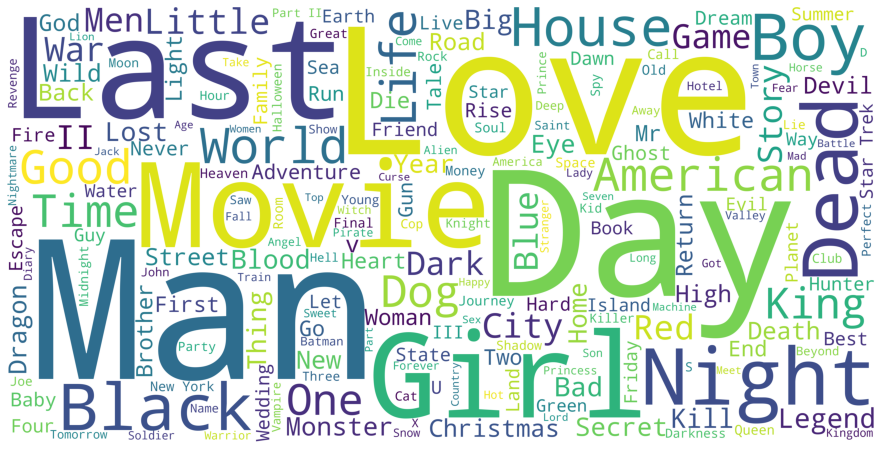

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### Quais os idiomas mais representativos

In [ ]:
lang_df = pd.DataFrame(df["original_language"].value_counts())
lang_df["language"] = lang_df.index 
lang_df.columns = ["number", 'language']
lang_df.head()

,number,language
en,5697,en
fr,75,fr
es,38,es
zh,28,zh
de,27,de


In [ ]:
df["original_language"].nunique()

38

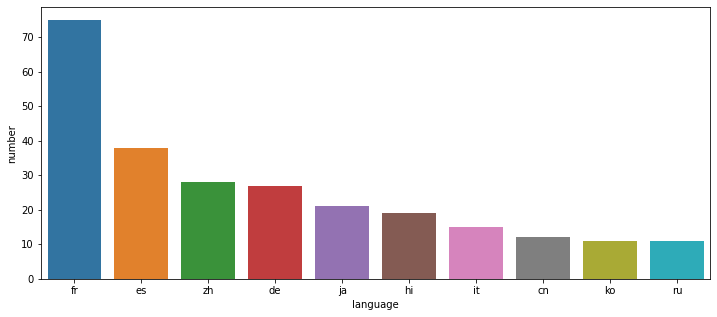

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x = "language", y = "number", data=lang_df[1:11])

#### Popularidade

In [ ]:
df["popularity"].describe()

count     6017.000000
mean        36.989470
std        290.192121
min          0.000372
25%          5.794466
50%         14.386807
75%         31.305336
max      17193.415000
Name: popularity, dtype: float64

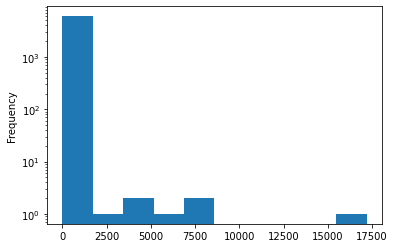

In [ ]:
df["popularity"].plot(logy=True, kind='hist')

In [ ]:
df[["original_title", "popularity", "year"]].sort_values("popularity", ascending=False).head(20)

,original_title,popularity,year
5952,Thor: Love and Thunder*,17193.415000,2022.0
5950,Jurassic World Dominion*,7974.814000,2022.0
5951,Minions: The Rise of Gru*,7294.760000,2022.0
5947,Top Gun: Maverick*,6087.102000,2022.0
5956,Lightyear*,4033.431000,2022.0
5948,Doctor Strange in the Multiverse of Madness*,3721.282000,2022.0
5978,Shut In,1894.184000,2022.0
5933,Spider-Man: No Way Home,1587.421000,2021.0
5953,Sonic the Hedgehog 2,1489.947000,2022.0
5339,Sonic the Hedgehog,1489.947000,2022.0


#### vote count

In [ ]:
df[["title", 'vote_count', 'year']].sort_values("vote_count", ascending=False).head(10)

,title,vote_count,year
4894,Avengers: Infinity War,25045,2018.0
5145,Avengers: Endgame,21473,2019.0
5247,Joker,20941,2019.0
4833,Black Panther,19331,2018.0
5199,The Lion King,15537,1994.0
4908,Deadpool 2,14898,2018.0
5032,Bohemian Rhapsody,14864,2018.0
5933,Spider-Man: No Way Home,14364,2021.0
96,Inception,13752,2010.0
5106,Captain Marvel,13284,2019.0


#### vote average

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


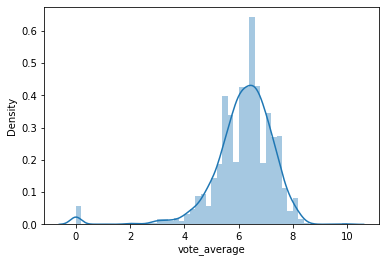

In [ ]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

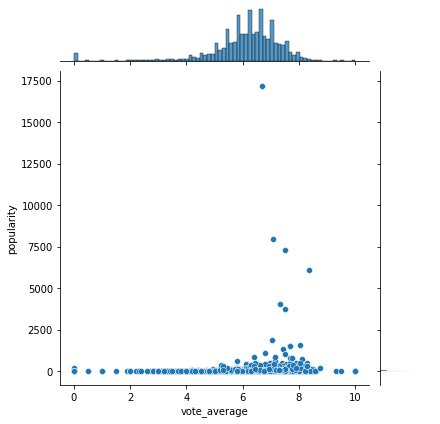

In [ ]:
sns.jointplot(x='vote_average', y="popularity", data=df)

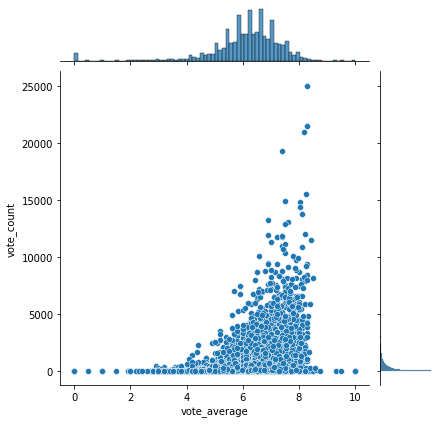

In [ ]:
sns.jointplot(x='vote_average', y="vote_count", data=df)

#### Em quais meses são lançados mais filmes

In [ ]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0


In [ ]:
df['month'] = pd.DatetimeIndex(df["release_date"]).month

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,cast,crew,return,year,month
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0,12.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007.0,5.0
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015.0,10.0
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012.0,7.0
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012.0,3.0


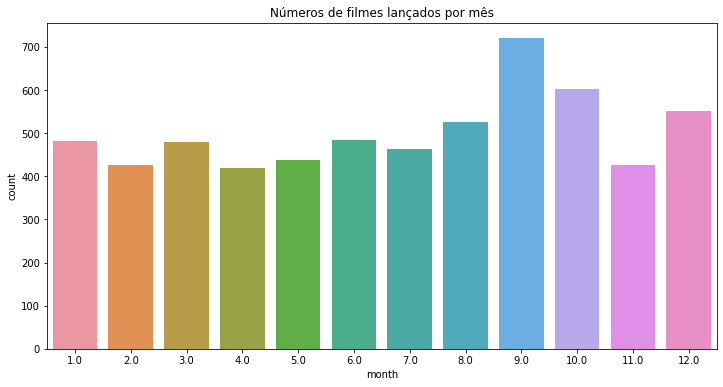

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Números de filmes lançados por mês")
sns.countplot(x="month", data=df)

(0.0, 12.0)

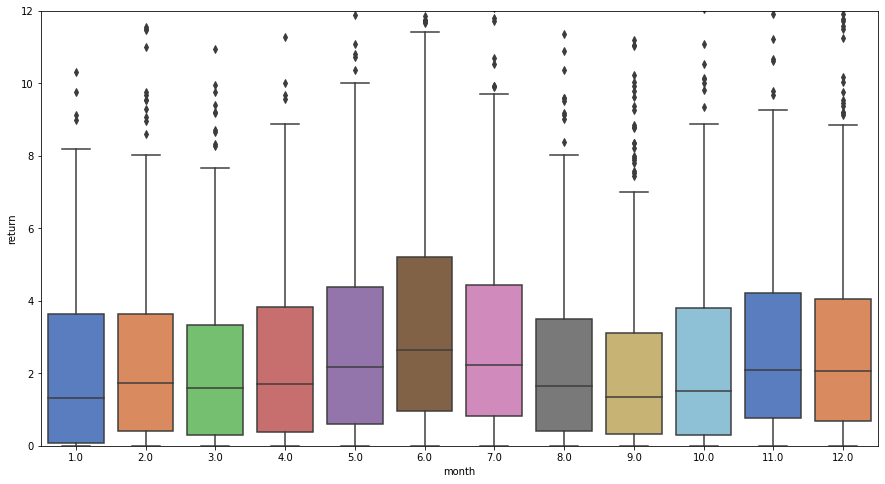

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.boxplot(x="month", y='return', data=df[df["return"].notnull()], palette="muted", ax=ax)
ax.set_ylim([0, 12])

#### numero de filmes por ano

In [ ]:
year_count = df.groupby('year')["original_title"].count()

In [ ]:
year_count

year
1913.0      1
1916.0      1
1925.0      1
1927.0      1
1929.0      2
         ... 
2018.0    245
2019.0    229
2020.0    257
2021.0    329
2022.0     76
Name: original_title, Length: 96, dtype: int64

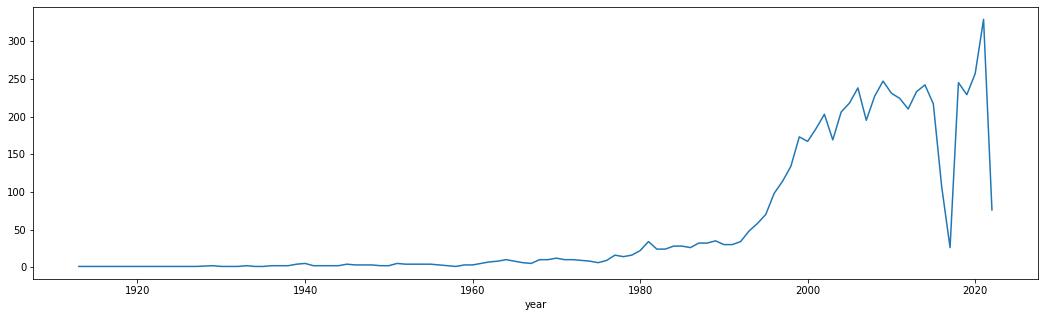

In [ ]:
plt.figure(figsize=(18,5))
year_count.plot()

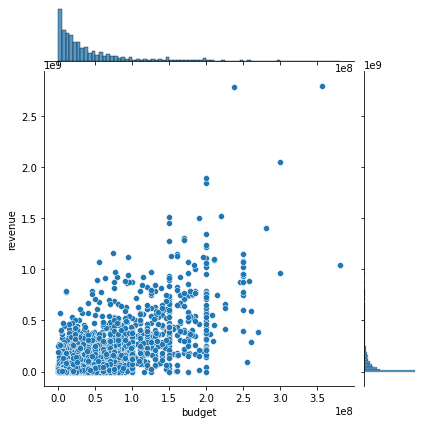

In [ ]:
sns.jointplot(x='budget', y="revenue", data=df[df["return"].notnull()])

# Implementando o sistema de recomendação

In [ ]:
# método utilizado: similaridade
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,cast,crew,return,year,month
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0,12.0


In [234]:
df_movies = df[['id','title','overview','genres','keywords','cast','crew']]

In [235]:
df_movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [236]:
df_movies.isnull().sum()

id          0
title       0
overview    4
genres      0
keywords    0
cast        0
crew        0
dtype: int64

Vou tirar os NA's de overview antes de prosseguir

In [237]:
df_movies[df_movies["overview"].isna()]

,id,title,overview,genres,keywords,cast,crew
2656,370980,Chiamatemi Francesco - Il Papa della gente,NaN,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...","[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,459488,"To Be Frank, Sinatra at 100",NaN,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."
4431,292539,Food Chains,NaN,"[{""id"": 99, ""name"": ""Documentary""}]",[],[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de..."
5075,855433,Escape Room: La Pel·lícula,NaN,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...","[{'id': 10292, 'name': 'gore'}, {'id': 224636,...","[{'adult': False, 'gender': 2, 'id': 19826, 'k...","[{'adult': False, 'gender': 2, 'id': 19826, 'k..."


In [238]:
type(df_movies["overview"])

pandas.core.series.Series

In [239]:
df_movies.drop(index = 2656, inplace = True)
df_movies.drop(index = 4140, inplace = True)
df_movies.drop(index = 4431, inplace = True)
df_movies.drop(index = 5075, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [240]:
df_movies.isnull().sum()

id          0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [241]:
# Função que retira a formatação JSON das colunas
def transform(t):
  lista_t = []
  for i in ast.literal_eval(t):
    lista_t.append(i["name"])
  return lista_t

In [242]:
df_movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [243]:
df_movies["genres"] = df_movies["genres"].apply(transform)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [244]:
df_movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


Deu certo, vou aplicar nas outras colunas

In [245]:
df_movies["keywords"] = df_movies["keywords"].apply(transform)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [246]:
df_movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [247]:
df_movies["cast"] = df_movies["cast"].apply(transform)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [215]:
df_movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [248]:
# Função que destaca o nome do diretor na coluna crew
def find_director(t):
  lista_t = []
  for i in ast.literal_eval(t):
    if i["job"] == "Director": # de acordo com a tag do arquivo JSON
      lista_t.append(i["name"])
  return lista_t

In [249]:
df_movies["crew"] = df_movies["crew"].apply(find_director)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [218]:
df_movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]


In [250]:
# função que retira dos espaços entre as palavras nas colunas
# Vai ser util na hora de aplicar a função que retira as stopwords
def replace_empty(l):
  lista_replace_t = []
  for i in l:
    lista_replace_t.append(i.replace(" ", ""))
  return lista_replace_t

In [251]:
df_movies["cast"] = df_movies["cast"].apply(replace_empty)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [221]:
df_movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[James Cameron]


Deu certo, vou aplicar nas outras

In [252]:
df_movies["crew"] = df_movies["crew"].apply(replace_empty)
df_movies["genres"] = df_movies["genres"].apply(replace_empty)
df_movies["keywords"] = df_movies["keywords"].apply(replace_empty)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [223]:
df_movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]


In [256]:
# aplicando um split na coluna overview
# vai ser util na hora de tirar as stopwords
df_movies["overview"]= [x.split() for x in df_movies["overview"].str.lower().dropna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [257]:
df_movies.tail(1)

,id,title,overview,genres,keywords,cast,crew
6018,767825,Moonshot,"[in, a, future, where, mars, is, terraformed, ...","[Comedy, Romance, ScienceFiction]","[planetmars, future, stowaway]","[ColeSprouse, LanaCondor, MasonGooding, EmilyR...",[ChristopherWinterbauer]


In [258]:
df_movies["tags"] = df_movies["overview"] + df_movies["genres"] + df_movies["keywords"] + df_movies["cast"] + df_movies["crew"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [259]:
df_movies.head(3)

,id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[in, the, 22nd, century,, a, paraplegic, marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[in, the, 22nd, century,, a, paraplegic, marin..."
1,285,Pirates of the Caribbean: At World's End,"[captain, barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[captain, barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[a, cryptic, message, from, bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[a, cryptic, message, from, bond’s, past, send..."


In [262]:
# Criando um df so com as tags
df3 = df_movies.drop(columns=["overview", "genres", "keywords", "cast", "crew"])

In [263]:
df3.head()

,id,title,tags
0,19995,Avatar,"[in, the, 22nd, century,, a, paraplegic, marin..."
1,285,Pirates of the Caribbean: At World's End,"[captain, barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[a, cryptic, message, from, bond’s, past, send..."
3,49026,The Dark Knight Rises,"[following, the, death, of, district, attorney..."
4,49529,John Carter,"[john, carter, is, a, war-weary,, former, mili..."


In [264]:
df3['tags'] = df3['tags'].apply(lambda i: " ".join(i))

In [265]:
df3.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [266]:
vectorizer = CountVectorizer(max_features=5000, stop_words="english")

In [267]:
vectorizer

CountVectorizer(max_features=5000, stop_words='english')

In [268]:
X = vectorizer.fit_transform(df3["tags"]).toarray()

In [269]:
X.shape

(6013, 5000)

In [270]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [271]:
similarity = cosine_similarity(X)

In [272]:
similarity

array([[1.        , 0.07233642, 0.05083286, ..., 0.        , 0.        ,
        0.16638958],
       [0.07233642, 1.        , 0.07905694, ..., 0.        , 0.        ,
        0.        ],
       [0.05083286, 0.07905694, 1.        , ..., 0.        , 0.03402069,
        0.03636965],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.14852213,
        0.        ],
       [0.        , 0.        , 0.03402069, ..., 0.14852213, 1.        ,
        0.        ],
       [0.16638958, 0.        , 0.03636965, ..., 0.        , 0.        ,
        1.        ]])

In [285]:
df3.head(20)

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."
5,559,Spider-Man 3,the seemingly invincible spider-man goes up ag...
6,38757,Tangled,when the kingdom's most wanted-and most charmi...
7,99861,Avengers: Age of Ultron,when tony stark tries to jumpstart a dormant p...
8,767,Harry Potter and the Half-Blood Prince,"as harry begins his sixth year at hogwarts, he..."
9,209112,Batman v Superman: Dawn of Justice,fearing the actions of a god-like super hero l...


In [274]:
df3[df3['title'] == "Spectre"].index[0]

2

In [275]:
# Função de recomendação
def sistema_recomendacao(movie):
  index = df3[df3["title"] == movie].index[0]
  distance = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x:x[1])
  for i in distance[1:6]:
    print(df3.iloc[i[0]].title)

In [276]:
sistema_recomendacao("Avatar")

Skylines
Battle: Los Angeles
Aliens vs Predator: Requiem
Titan A.E.
War of the Worlds: Annihilation


In [277]:
sistema_recomendacao('Avengers: Age of Ultron')

The Avengers
Avengers: Infinity War
Captain America: Civil War
Iron Man 3
Avengers: Endgame


In [280]:
sistema_recomendacao('Rubius X')

Silver Medalist
VeggieTales: The Pirates Who Don't Do Anything
Puss in Boots
Crouching Tiger, Hidden Dragon
The Blue Butterfly


In [284]:
sistema_recomendacao('The Adam Project')

Ri¢hie Ri¢h
Darkness
Marley & Me
Think Like a Dog
The Master of Disguise


In [286]:
sistema_recomendacao('Harry Potter and the Half-Blood Prince')

Harry Potter and the Order of the Phoenix
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Chamber of Secrets
Harry Potter and the Philosopher's Stone


Deu certo!

In [288]:
# Agora pro deploy
pickle.dump(df3, open('lista_filmes.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))